# **Multi Classification Problem**
* **Classify the quality of Red-Wine**

**Import requires libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 500)

**Read the data**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/subhashdixit/Support_Vector_Machines/main/SVC/Red_Wine_Quality/winequality-red.csv')

In [3]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True )
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Shape of the data**

In [4]:
df.shape

(1599, 12)

**Unique values in target variable**

In [5]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

**Number of values in each category**

In [6]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

**Observation**
* **Highly imbalanced data. We have to perform sampling**

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**Information about the data**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Statistical Analysis**

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


**Check null values in the dataset**

In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## **Outliers (Optional) - Don't Use for this dataset**
* I have not used this because due to this our model accuracy was getting affected. I have kept as it is so that it can help me in future. AFter trying different method I try to use sampling technique only
*  I will suggest people to use these methods so that anyonce can understand what happens if we remove outliers and if we not

### **Outliers Treatment for all the features at once(Optional)**

In [11]:
# plt.figure(figsize=(20, 8))
# sns.boxplot(data = df)
# plt.title("Boxplot of all the feature")

In [12]:
# df.columns

In [13]:
# def find_boundaries(df, variable, distance):
#  IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
#  lower_boundary = df[variable].quantile(0.25) - (IQR*distance)
#  upper_boundary = df[variable].quantile(0.75) + (IQR*distance)
#  return upper_boundary, lower_boundary

In [14]:
# outliers_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#        'pH', 'sulphates', 'alcohol', 'quality']
# for i in outliers_columns:
#   upper_boundary, lower_boundary = find_boundaries(df,i, 1.5)
#   outliers = np.where(df[i] > upper_boundary, True, np.where(df[i] < lower_boundary, True, False))
#   outliers_df = df.loc[outliers, i]
#   df_trimed= df.loc[~outliers, i]
#   df[i] = df_trimed

In [15]:
# plt.figure(figsize=(15, 8))
# sns.boxplot(data = df)
# plt.title("After Removing Outliers")

In [16]:
# df.isnull().sum()

In [17]:
# df_copy = df

In [18]:
# df.fillna(df_copy.mean().round(1), inplace=True)

In [19]:
# df.isnull().sum()

### **Individual Features Outliers Treatment based on observation (Optional)**


**fixed acidity**

In [20]:
# plt.figure(figsize=(20, 8))
# sns.boxplot(df=df['fixed acidity'])
# plt.title("Before Removing Outliers")

In [21]:
# outliers = df[df['fixed acidity'] >=12]['fixed acidity']
# df['fixed acidity'] = df[df['fixed acidity'] < 12]['fixed acidity']

In [22]:
# df['fixed acidity'].fillna(df['fixed acidity'].mean().round(1), inplace=True)

In [23]:
# plt.figure(figsize=(10, 8))
# sns.boxplot(df=df['fixed acidity'])
# plt.title("Before Removing Outliers")

**volatile acidity**

In [24]:
# plt.figure(figsize=(10, 8))
# sns.boxplot(df=df['volatile acidity'])
# plt.title("Before Removing Outliers")

In [25]:
# outliers = df[df['volatile acidity'] >=1]['volatile acidity']
# df['volatile acidity'] = df[df['volatile acidity'] < 1]['volatile acidity']

In [26]:
# df['volatile acidity'].fillna(df['volatile acidity'].mean().round(1), inplace=True)

In [27]:
# plt.figure(figsize=(10, 8))
# sns.boxplot(df=df['volatile acidity'])
# plt.title("After Removing Outliers")

**citric acid**

In [28]:
# plt.figure(figsize=(10, 8))
# sns.boxplot(df=df['citric acid'])
# plt.title("Before Removing Outliers")

**residual sugar**

In [29]:
# plt.figure(figsize=(10, 8))
# sns.boxplot(df=df['residual sugar'])
# plt.title("Before Removing Outliers")

In [30]:
# upper_boundary, lower_boundary = find_boundaries(df,'residual sugar', 1.1)
# outliers = np.where(df['residual sugar'] > upper_boundary, True, np.where(df['residual sugar'] < lower_boundary, True, False))
# outliers_df = df.loc[outliers, 'residual sugar']
# df_trimed= df.loc[~outliers, 'residual sugar']
# df['residual sugar'] = df_trimed

In [31]:
# upper_boundary, lower_boundary 

In [32]:
# plt.figure(figsize=(10, 8))
# sns.boxplot(df=df['residual sugar'])
# plt.title("Before Removing Outliers")

**chlorides**

In [33]:
# plt.figure(figsize=(10, 8))
# sns.boxplot(df=df['chlorides'])
# plt.title("Before Removing Outliers")

In [34]:
# upper_boundary, lower_boundary = find_boundaries(df,'chlorides', 1.2)
# outliers = np.where(df['chlorides'] > upper_boundary, True, np.where(df['chlorides'] < lower_boundary, True, False))
# outliers_df = df.loc[outliers, 'chlorides']
# df_trimed= df.loc[~outliers, 'chlorides']
# df['chlorides'] = df_trimed

In [35]:
# upper_boundary, lower_boundary

In [36]:
# plt.figure(figsize=(10, 8))
# sns.boxplot(df=df['chlorides'])
# plt.title("Before Removing Outliers")

**free sulfur dioxide**

In [37]:
# plt.figure(figsize=(10, 8))
# sns.boxplot(df=df['free sulfur dioxide'])
# plt.title("Before Removing Outliers")

In [38]:
# upper_boundary, lower_boundary = find_boundaries(df,'free sulfur dioxide', 1.5)
# outliers = np.where(df['free sulfur dioxide'] > upper_boundary, True, np.where(df['free sulfur dioxide'] < lower_boundary, True, False))
# outliers_df = df.loc[outliers, 'free sulfur dioxide']
# df_trimed= df.loc[~outliers, 'free sulfur dioxide']
# df['free sulfur dioxide'] = df_trimed

In [39]:
# upper_boundary, lower_boundary

In [40]:
# plt.figure(figsize=(10, 8))
# sns.boxplot(df=df['free sulfur dioxide'])
# plt.title("Before Removing Outliers")

**total sulfur dioxide**

In [41]:
# plt.figure(figsize=(10, 8))
# sns.boxplot(df=df['total sulfur dioxide'])
# plt.title("Before Removing Outliers")

In [42]:
# upper_boundary, lower_boundary = find_boundaries(df,'total sulfur dioxide', 1.3)
# outliers = np.where(df['total sulfur dioxide'] > upper_boundary, True, np.where(df['total sulfur dioxide'] < lower_boundary, True, False))
# outliers_df = df.loc[outliers, 'total sulfur dioxide']
# df_trimed= df.loc[~outliers, 'total sulfur dioxide']
# df['total sulfur dioxide'] = df_trimed

In [43]:
# upper_boundary, lower_boundary 

In [44]:
# plt.figure(figsize=(10, 8))
# sns.boxplot(df=df['total sulfur dioxide'])
# plt.title("Before Removing Outliers")

**density**

In [45]:
# plt.figure(figsize=(10, 8))
# sns.boxplot(df=df['density'])
# plt.title("Before Removing Outliers")

In [46]:
# upper_boundary, lower_boundary = find_boundaries(df,'density', 1.5)
# outliers = np.where(df['density'] > upper_boundary, True, np.where(df['density'] < lower_boundary, True, False))
# outliers_df = df.loc[outliers, 'density']
# df_trimed= df.loc[~outliers, 'density']
# df['density'] = df_trimed

In [47]:
# upper_boundary, lower_boundary

In [48]:
# plt.figure(figsize=(10, 8))
# sns.boxplot(df=df['density'])
# plt.title("Before Removing Outliers")

**pH**

In [49]:
# plt.figure(figsize=(10, 8))
# sns.boxplot(df=df['pH'])
# plt.title("Before Removing Outliers")

In [50]:
# upper_boundary, lower_boundary = find_boundaries(df,'pH', 1.5)
# outliers = np.where(df['pH'] > upper_boundary, True, np.where(df['pH'] < lower_boundary, True, False))
# outliers_df = df.loc[outliers, 'pH']
# df_trimed= df.loc[~outliers, 'pH']
# df['pH'] = df_trimed

In [51]:
# upper_boundary, lower_boundary

In [52]:
# plt.figure(figsize=(10, 8))
# sns.boxplot(df=df['pH'])
# plt.title("Before Removing Outliers")

**sulphates**

In [53]:
# plt.figure(figsize=(10, 8))
# sns.boxplot(df=df['sulphates'])
# plt.title("Before Removing Outliers")

In [54]:
# upper_boundary, lower_boundary = find_boundaries(df,'sulphates', 1.4)
# outliers = np.where(df['sulphates'] > upper_boundary, True, np.where(df['sulphates'] < lower_boundary, True, False))
# outliers_df = df.loc[outliers, 'sulphates']
# df_trimed= df.loc[~outliers, 'sulphates']
# df['sulphates'] = df_trimed

In [55]:
# upper_boundary, lower_boundary

In [56]:
# plt.figure(figsize=(10, 8))
# sns.boxplot(df=df['sulphates'])
# plt.title("Before Removing Outliers")

**alcohol**

In [57]:
# plt.figure(figsize=(10, 8))
# sns.boxplot(df=df['alcohol'])
# plt.title("Before Removing Outliers")

In [58]:
# upper_boundary, lower_boundary = find_boundaries(df,'alcohol', 1.35)
# outliers = np.where(df['alcohol'] > upper_boundary, True, np.where(df['alcohol'] < lower_boundary, True, False))
# outliers_df = df.loc[outliers, 'alcohol']
# df_trimed= df.loc[~outliers, 'alcohol']
# df['alcohol'] = df_trimed

In [59]:
# upper_boundary, lower_boundary

In [60]:
# plt.figure(figsize=(10, 8))
# sns.boxplot(df=df['alcohol'])
# plt.title("Before Removing Outliers")

**quality**

In [61]:
# plt.figure(figsize=(10, 8))
# sns.boxplot(df=df['quality'])
# plt.title("Before Removing Outliers")

In [62]:
# upper_boundary, lower_boundary = find_boundaries(df,'quality', 1.5)
# outliers = np.where(df['quality'] > upper_boundary, True, np.where(df['quality'] < lower_boundary, True, False))
# outliers_df = df.loc[outliers, 'quality']
# df_trimed= df.loc[~outliers, 'quality']
# df['quality'] = df_trimed

In [63]:
# upper_boundary, lower_boundary

In [64]:
# plt.figure(figsize=(10, 8))
# sns.boxplot(df=df['quality'])
# plt.title("Before Removing Outliers")

In [65]:
# df.isnull().sum()

In [66]:
# df.fillna(df.mean().round(1), inplace=True)

In [67]:
# df.isnull().sum()

# **Graphical Analysis**

In [68]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [69]:
df['quality'] = df['quality'].astype('int')

**Boxplot**
* To check outliers

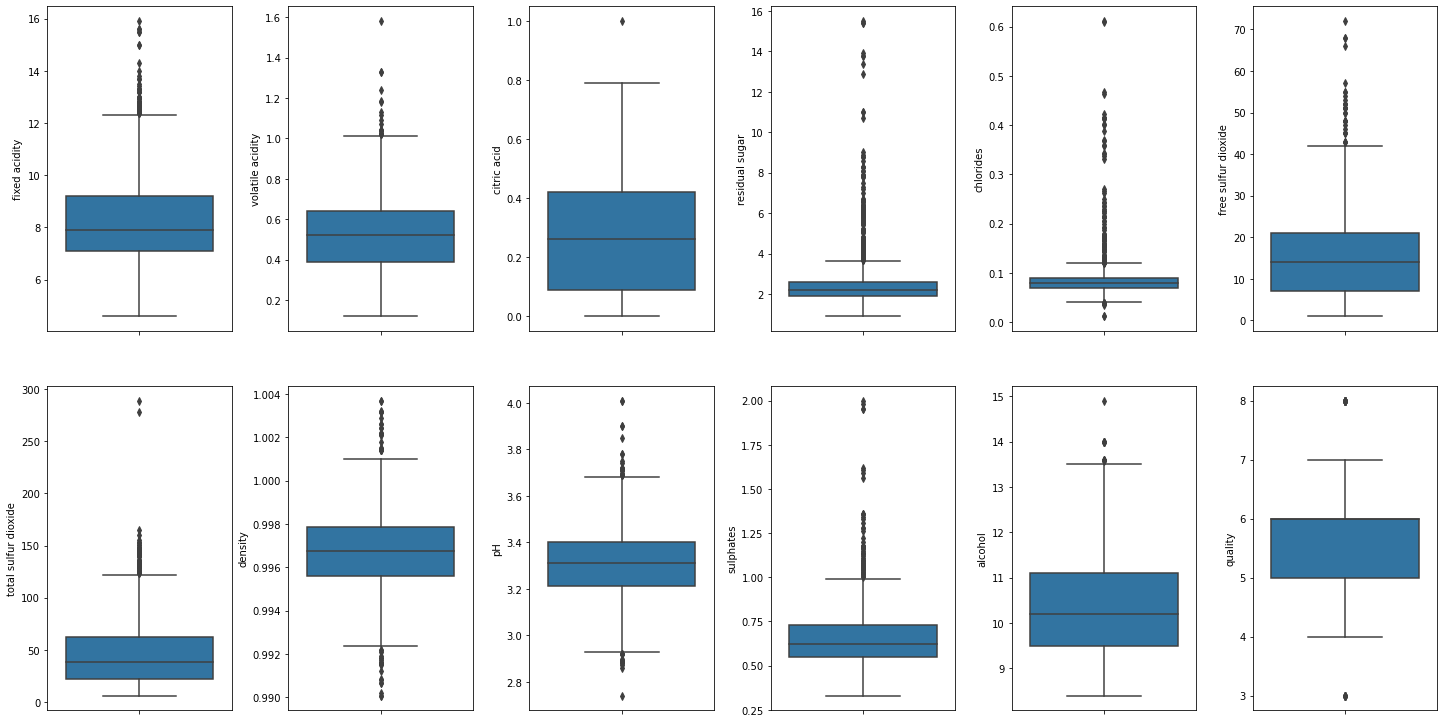

In [70]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
  sns.boxplot(y = col, data = df, ax=ax[index])
  index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

**Histplot**
* To check Normal Distribution

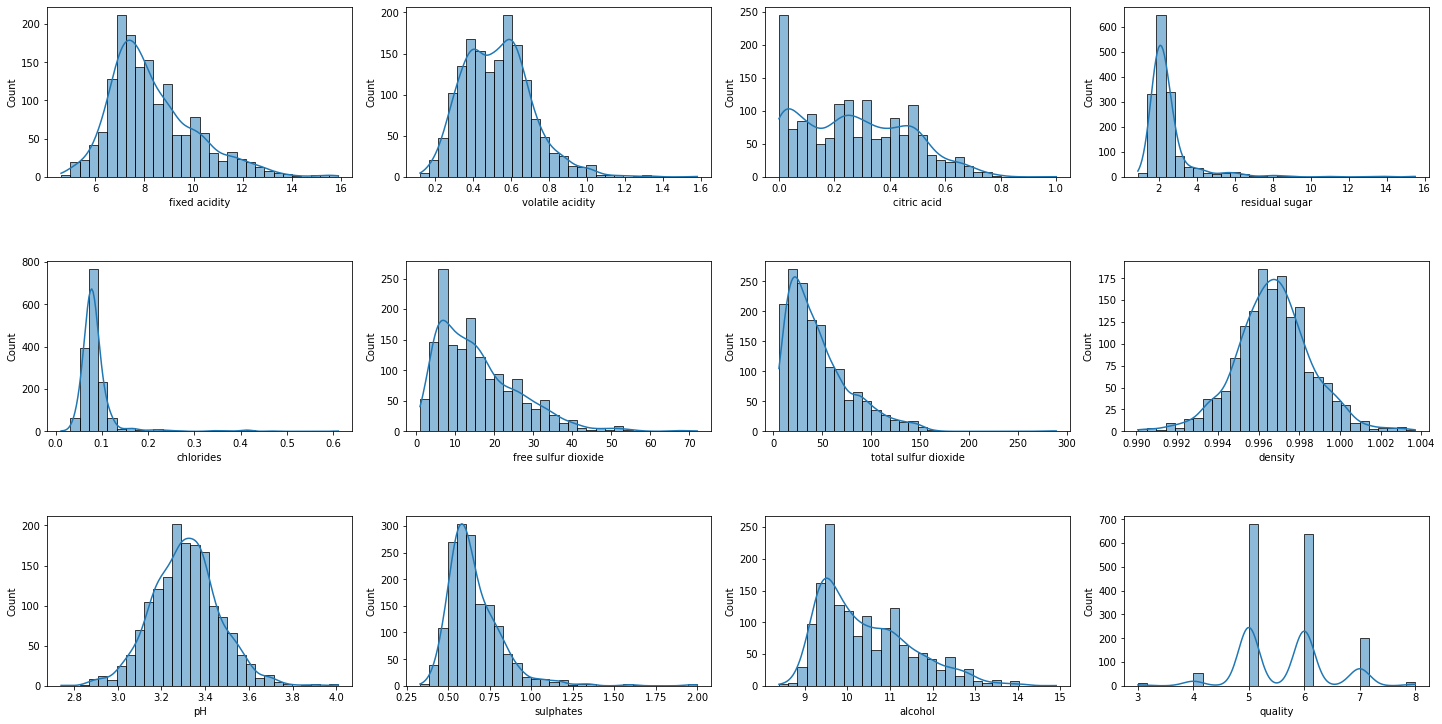

In [71]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
  sns.histplot(value, ax=ax[index], kde=True, bins=30)
  index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

**Observation:**
* Right Skewed Distribution
  * citric acid
  * free sulfur dioxide
  * total sulfur dioxide
  * alcohol

### **Transformation (Optional)**
* Like I menyioned above , I have tried different approach but I didn't remove anythngs from the code. It will me in understaing the problem very well. Every dataset requires different approach

**citric acid**

In [72]:
# df['citric acid'] = np.sqrt(df['citric acid'])
# df['citric acid'].head()

In [73]:
# plt.figure(figsize=(12,8))
# sns.histplot(data = df, x='citric acid',kde=True, bins=30, color='blue')
# plt.show()

**free sulfur dioxide**

In [74]:
# df['free sulfur dioxide'] = np.sqrt(df['free sulfur dioxide'])
# df['free sulfur dioxide'].head()

In [75]:
# plt.figure(figsize=(12,8))
# sns.histplot(data = df, x='free sulfur dioxide',kde=True, bins=30, color='blue')
# plt.show();

**total sulfur dioxide**

In [76]:
# df['total sulfur dioxide'] = np.sqrt(df['total sulfur dioxide'])
# df['total sulfur dioxide'].head()

In [77]:
# plt.figure(figsize=(12,8))
# sns.histplot(data = df, x='total sulfur dioxide',kde=True, bins=30, color='blue')
# plt.show()

**alcohol**

In [78]:
# df['alcohol'] = np.log(df['alcohol'])
# df['alcohol'].head()

In [79]:
# plt.figure(figsize=(12,8))
# sns.histplot(data = df, x='alcohol',kde=True, bins=30, color='blue')
# plt.show();

# **Multivariate Analysis**

## **Correlation**

In [80]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


**Heatmap**
* To check correlation between the features

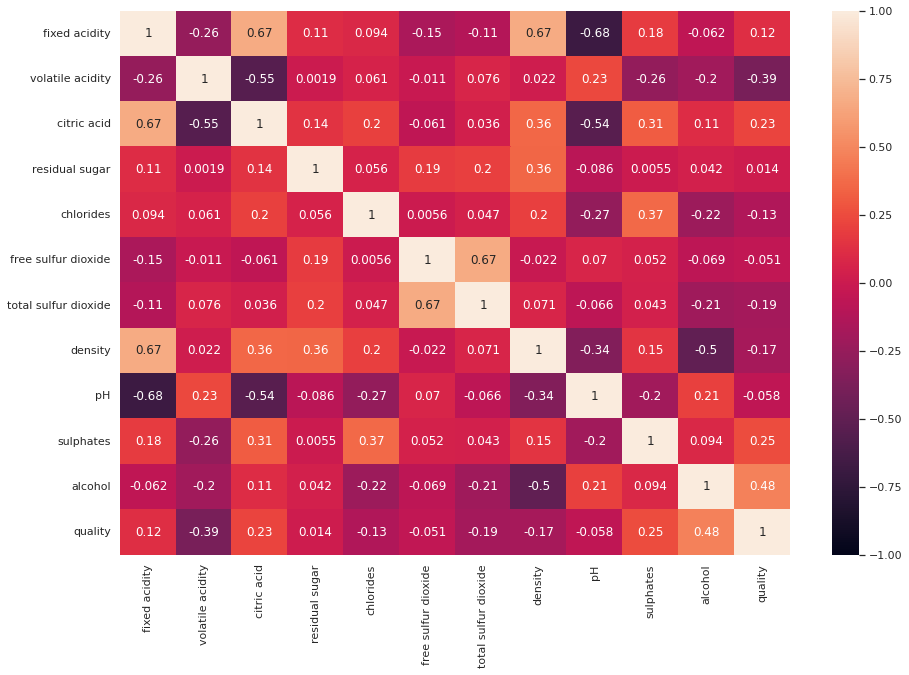

In [81]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data = df.corr(), annot=True,  vmin=-1, vmax=1)

Remove the below features because their correlation wrt target variable is very less
* Residual Sugar
* free sulfur dioxide
* pH

# **Segregate independent and dependent variable**

In [82]:
X=df.drop("quality",axis=1)

In [83]:
y=df["quality"]

# **Train Test Split**

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [85]:
print(X_train.shape)
print(X_test.shape)

(1071, 11)
(528, 11)


In [86]:
print(y_train.shape)
print(y_test.shape)

(1071,)
(528,)


# **Scaling**

In [87]:
 from sklearn.preprocessing import StandardScaler

In [88]:
scaler = StandardScaler()

In [89]:
scaler.fit(X_train)##It will perform standarization based on the calculation of the mean and std dev

StandardScaler()

In [90]:
print(scaler.mean_)

[ 8.30345472  0.53246499  0.26933707  2.54691877  0.08772736 15.91223156
 46.76330532  0.99677933  3.31453782  0.65881419 10.41521942]


In [91]:
X_train_tf=scaler.transform(X_train)
X_train_tf

array([[ 2.40069523, -1.03103722,  1.12742595, ..., -1.26096312,
         0.52726134, -0.01431863],
       [-0.93967131,  1.22920403, -1.32502245, ...,  1.52622836,
        -0.28225704,  2.24363201],
       [-0.99827424,  0.55113165, -1.37611513, ..., -0.74241587,
        -1.20742091, -0.86105011],
       ...,
       [-0.6466567 ,  0.49462562, -1.06955908, ...,  1.26695473,
        -0.68701624, -0.86105011],
       [-0.23643625, -1.87862768,  0.4121285 , ...,  0.03540501,
         0.81637505,  1.39690052],
       [-1.46709761, -1.3700734 , -0.04770558, ...,  0.48913386,
        -0.68701624,  2.90220094]])

# **Support Vector Classifier (SVC)**

In [92]:
from sklearn.svm import SVC
SVC_Model=SVC()

In [93]:
SVC_Model.fit(X_train_tf,y_train)

SVC()

## **Saving the model using pickle**

In [94]:
import pickle 
with open("RedWineQualitySVC.pkl", 'wb') as f:
    pickle.dump(SVC_Model, f)

**Train Accuracy**

In [95]:
SVC_Model.score(X_train_tf,y_train)

0.6778711484593838

### **Test Data**

**Scaling on Test Data**

In [96]:
X_test_tf=scaler.transform(X_test)
X_test_tf

array([[-3.53642095e-01,  1.55589436e-01, -9.67373729e-01, ...,
        -4.83142240e-01,  6.85666499e-03, -7.66968836e-01],
       [-2.95039173e-01, -1.83446751e-01, -5.07539654e-01, ...,
         4.89133857e-01, -1.03395269e+00, -8.61050113e-01],
       [ 1.40444556e+00,  7.77155778e-01, -2.52076279e-01, ...,
        -2.23868614e-01,  1.85718440e+00, -4.84725007e-01],
       ...,
       [-2.02456406e-03, -1.25706134e+00,  6.16499196e-01, ...,
        -2.94133945e-02,  6.42906824e-01,  1.96138818e+00],
       [-6.06274859e-02,  4.50655383e+00, -1.37611513e+00, ...,
         1.39659155e+00, -9.76129945e-01,  4.56087756e-01],
       [ 4.66798811e-01,  7.20649747e-01, -6.09725004e-01, ...,
        -2.23868614e-01, -6.87016236e-01, -7.66968836e-01]])

## **Importing pickle file for test data prediction**

In [97]:
SVC_load = pickle.load(open('RedWineQualitySVC.pkl', 'rb'))

In [98]:
y_predict_SVC = SVC_load.predict(X_test_tf)

In [99]:
y_test

803     6
124     5
350     6
682     5
1326    6
       ..
813     4
377     7
898     7
126     5
819     5
Name: quality, Length: 528, dtype: int64

**Test Accuracy**

In [100]:
from sklearn.metrics import classification_report, confusion_matrix

In [101]:
print("--------------------------------------------------------")
print("COnfusion Matrix")
print(confusion_matrix(y_test,y_predict_SVC))
print("--------------------------------------------------------")
print("Classification report")
print(classification_report(y_test,y_predict_SVC))
print("--------------------------------------------------------")

--------------------------------------------------------
COnfusion Matrix
[[  0   0   2   0   0   0]
 [  0   0  13   6   0   0]
 [  0   0 170  46   1   0]
 [  0   0  76 127  10   0]
 [  0   0   0  51  19   0]
 [  0   0   0   3   4   0]]
--------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.65      0.78      0.71       217
           6       0.55      0.60      0.57       213
           7       0.56      0.27      0.37        70
           8       0.00      0.00      0.00         7

    accuracy                           0.60       528
   macro avg       0.29      0.28      0.27       528
weighted avg       0.56      0.60      0.57       528

--------------------------------------------------------


## **GridSearchCV**
* GridSearch cross-validation
* GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It’s essentially a cross-validation technique. The model as well as the parameters must be entered. After extracting the best parameter values, predictions are made.

In [102]:
from sklearn.model_selection import GridSearchCV

**1. Kernels**
* The main function of the kernel is to take low dimensional input space and transform it into a higher-dimensional space. It is mostly useful in non-linear separation problem

**2. C (Regularisation)** 
* C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimisation how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term.
when C is high it will classify all the df points correctly, also there is a chance to overfit

**3. Gamma**
* It defines how far influences the calculation of plausible line of separation.
when gamma is higher, nearby points will have high influence; low gamma means far away points also be considered to get the decision boundary.

In [103]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear','rbf']}

In [104]:
grid_model = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid_model.fit(X_train_tf,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.549 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.561 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.561 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.593 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.659 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.433 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.435 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.435 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.435 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.430 total time=   0.1s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.549 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [105]:
print(grid_model.best_estimator_)

SVC(C=10, gamma=1)


**Train Accuracy**

In [106]:
grid_model.score(X_train_tf, y_train)

0.9990662931839402

### **Test Data**

**Test Accuracy**

In [107]:
from sklearn.metrics import classification_report, confusion_matrix

In [108]:
grid_model_predictions = grid_model.predict(X_test_tf)
print("--------------------------------------------------------")
print("COnfusion Matrix")
print(confusion_matrix(y_test,grid_model_predictions))
print("--------------------------------------------------------")
print("Classification report")
print(classification_report(y_test,grid_model_predictions))
print("--------------------------------------------------------")

--------------------------------------------------------
COnfusion Matrix
[[  0   0   1   1   0   0]
 [  0   0  12   7   0   0]
 [  0   3 153  57   4   0]
 [  0   2  51 148  12   0]
 [  0   0   7  31  30   2]
 [  0   0   0   4   2   1]]
--------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.68      0.71      0.69       217
           6       0.60      0.69      0.64       213
           7       0.62      0.43      0.51        70
           8       0.33      0.14      0.20         7

    accuracy                           0.63       528
   macro avg       0.37      0.33      0.34       528
weighted avg       0.61      0.63      0.61       528

--------------------------------------------------------


## **Sampling to handle imbalanced dataset**

**SMOTE-Tomek Sampling**

In [109]:
X.shape

(1599, 11)

In [110]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [111]:
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
sampled_x, sampled_y = resample.fit_resample(X, y)

In [112]:
print(sampled_x.shape)
print(sampled_y.shape)

(4083, 11)
(4083,)


**Since our dfset shape has changed we need to perform train_test_split again**

In [113]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(sampled_x, sampled_y, test_size=0.25, random_state=44)

**Applying standardization to our model**


In [114]:
scaler.fit(X_train)
X_train_tf_sm = scaler.transform(X_train_sm)
X_test_tf_sm = scaler.transform(X_test_sm)

In [115]:
grid_model.fit(X_train_tf_sm, y_train_sm)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.594 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.608 total time=   0.2s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.596 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.564 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.605 total time=   0.2s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.553 total time=   0.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.597 total time=   0.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.583 total time=   0.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.560 total time=   0.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.619 total time=   0.6s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.594 total time=   0.2s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

**Train Accuracy**


In [116]:
grid_model.score(X_train_tf_sm, y_train_sm)

1.0

### **Test Data**

**Prediction on Test Data**

In [117]:
y_predict_grid_sm = grid_model.predict(X_test_tf_sm)

**Test Accuracy**


In [118]:
from sklearn.metrics import classification_report, confusion_matrix

In [119]:
print("--------------------------------------------------------")
print("COnfusion Matrix")
print(confusion_matrix(y_test_sm,y_predict_grid_sm))
print("--------------------------------------------------------")
print("Classification report")
print(classification_report(y_test_sm,y_predict_grid_sm))
print("--------------------------------------------------------")

--------------------------------------------------------
COnfusion Matrix
[[151   0   0   0   0   0]
 [  0 170  10   6   0   0]
 [  0   8 113  55   2   1]
 [  0   4  26 120  16   0]
 [  0   0   1  12 156   1]
 [  0   0   0   0   0 169]]
--------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       151
           4       0.93      0.91      0.92       186
           5       0.75      0.63      0.69       179
           6       0.62      0.72      0.67       166
           7       0.90      0.92      0.91       170
           8       0.99      1.00      0.99       169

    accuracy                           0.86      1021
   macro avg       0.87      0.86      0.86      1021
weighted avg       0.86      0.86      0.86      1021

--------------------------------------------------------


# **Logistic Regression Model**

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
LR_model = LogisticRegression()

In [122]:
LR_model.fit(X_train_tf,y_train)

LogisticRegression()

**Train Accuracy**

In [123]:
LR_model.score(X_train_tf,y_train)

0.6218487394957983

### **Test Data**

In [124]:
y_predict_LR=LR_model.predict(X_test_tf)

**Test Accuracy**

In [125]:
from sklearn.metrics import classification_report, confusion_matrix

In [126]:
print("--------------------------------------------------------")
print("COnfusion Matrix")
print(confusion_matrix(y_test,y_predict_LR))
print("--------------------------------------------------------")
print("Classification report")
print(classification_report(y_test,y_predict_LR))
print("--------------------------------------------------------")

--------------------------------------------------------
COnfusion Matrix
[[  1   0   1   0   0   0]
 [  0   1  10   7   1   0]
 [  1   0 164  52   0   0]
 [  0   0  78 119  16   0]
 [  0   0   5  48  17   0]
 [  0   0   0   2   5   0]]
--------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           3       0.50      0.50      0.50         2
           4       1.00      0.05      0.10        19
           5       0.64      0.76      0.69       217
           6       0.52      0.56      0.54       213
           7       0.44      0.24      0.31        70
           8       0.00      0.00      0.00         7

    accuracy                           0.57       528
   macro avg       0.52      0.35      0.36       528
weighted avg       0.57      0.57      0.55       528

--------------------------------------------------------


# **Conclusion**

In [127]:
from sklearn.metrics import accuracy_score

In [128]:
print("Final Test Accuracy Score of all the Models")
print("--------------------------------------------------------")
print(f"SVC without optimization : {round(accuracy_score(y_test,y_predict_SVC),2)}")
print(f"SVC after grid search cv optimization : {round(accuracy_score(y_test,grid_model_predictions),2)}")
print(f"SVC after sampling using grid search cv : {round(accuracy_score(y_test_sm,y_predict_grid_sm),2)}")
print(f"Logistic Rggression : {round(accuracy_score(y_test,y_predict_LR),2)}")

Final Test Accuracy Score of all the Models
--------------------------------------------------------
SVC without optimization : 0.6
SVC after grid search cv optimization : 0.63
SVC after sampling using grid search cv : 0.86
Logistic Rggression : 0.57
